In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
                             train_data[0]])

565248/550378 [==============================] - 0s 0us/step


preparing the data

---




In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))  
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Building your network

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compiling the model

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Validating approach

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Training the model

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.7835 - accuracy: 0.4905 - val_loss: 1.8362 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5010 - accuracy: 0.6969 - val_loss: 1.3418 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.0853 - accuracy: 0.7749 - val_loss: 1.1422 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8505 - accuracy: 0.8242 - val_loss: 1.0525 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6753 - accuracy: 0.8567 - val_loss: 0.9874 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5438 - accuracy: 0.8859 - val_loss: 0.9255 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4416 - accuracy: 0.9052 - val_loss: 0.8950 - val_accuracy: 0.8140
Epoch 8/20
16

Plotting the training and validation loss

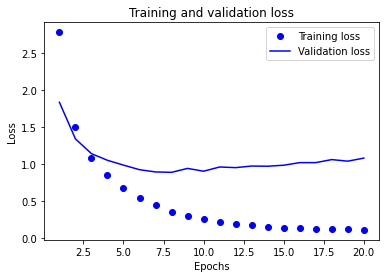

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 2.6262 - accuracy: 0.5215 - val_loss: 1.7530 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4338 - accuracy: 0.6989 - val_loss: 1.3336 - val_accuracy: 0.7090
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0548 - accuracy: 0.7752 - val_loss: 1.1534 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8223 - accuracy: 0.8285 - val_loss: 1.0648 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6505 - accuracy: 0.8702 - val_loss: 0.9638 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 1s 46ms/step - loss: 0.5216 - accuracy: 0.8955 - val_loss: 0.9460 - val_accuracy: 0.7950
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4196 - accuracy: 0.9138 - val_loss: 0.9334 - val_accuracy: 0.7970
Epoch 8/9
16/16 [===

In [15]:
results

[1.0491423606872559, 0.7756010890007019]